In [13]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.reset_option('display.max_rows')


# Importing the dataset
X_dataset = pd.read_csv('X_visit_and_deltas_fours.csv')
Y_RNFL = pd.read_csv('Y_visit_fours_RNFL.csv')
Y_GCA = pd.read_csv('Y_visit_fours_GCA.csv')
Y_VFI = pd.read_csv('Y_visit_fours_VFI.csv')
Y_MD = pd.read_csv('Y_visit_fours_MD.csv')

In [14]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, StandardScaler

#label encoding dx: 3 total
labelencoder_X_1 = LabelEncoder()
X_dataset.iloc[:, 0] = labelencoder_X_1.fit_transform(X_dataset.iloc[:, 0])

#label encoding gender: 2 total
labelencoder_X_2 = LabelEncoder()
X_dataset.iloc[:, 1] = labelencoder_X_2.fit_transform(X_dataset.iloc[:, 1])

#label encoding race: 3 total
labelencoder_X_3 = LabelEncoder()
X_dataset.iloc[:, 2] = labelencoder_X_3.fit_transform(X_dataset.iloc[:, 2])



In [15]:
print(X_dataset['primary_dx'].value_counts())
print(X_dataset['gender'].value_counts())
print(X_dataset['race'].value_counts())

0    1765
1     646
2      10
Name: primary_dx, dtype: int64
0    1403
1    1018
Name: gender, dtype: int64
white    1844
black     456
asian     121
Name: race, dtype: int64


In [16]:
X_dataset = pd.get_dummies(X_dataset, columns=['primary_dx', 'race'], drop_first=True)

In [17]:
#primary_dx_1 = glaucoma suspect
#primary_dx_2 = OHTN
#race_1 = black
#race_2 = white

X_dataset.rename(columns={'race_1':'black', 'race_2':'white', 'primary_dx_1':'GS','primary_dx_2':'OHTN'}, inplace=True)
X_dataset

X_dataset = X_dataset.iloc[:, 1:]
X_dataset
Y_RNFL = Y_RNFL.iloc[:, 1:]
Y_VFI = Y_VFI.iloc[:, 1:]
Y_MD = Y_MD.iloc[:, 1:]
Y_GCA = Y_GCA.iloc[:, 1:]

listing = pd.Series(X_dataset.columns.values)
listing

0                    gender
1              avg_cd_ratio
2               gca_average
3               gca_tempsup
4                   gca_sup
5                gca_nassup
6                gca_nasinf
7                   gca_inf
8               gca_tempinf
9              rnfl_average
10             rnfl_tempsup
11                 rnfl_sup
12              rnfl_nassup
13              rnfl_nasinf
14                 rnfl_inf
15             rnfl_tempinf
16                       md
17                     p_md
18                      psd
19                    p_psd
20                      vfi
21                      age
22        avg_cd_ratio_twos
23         gca_average_twos
24         gca_tempsup_twos
25             gca_sup_twos
26          gca_nassup_twos
27          gca_nasinf_twos
28             gca_inf_twos
29         gca_tempinf_twos
               ...         
78     rnfl_tempinf_delta_1
79               md_delta_1
80             p_md_delta_1
81              psd_delta_1
82            p_psd_

In [18]:
def ann_model():
    # Initialising the ANN
    classifier = Sequential()
    
    #Batch normalization
#     classifier.add(BatchNormalization(axis = 1))
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'linear', input_dim = 108))
    classifier.add(LeakyReLU(alpha = 0.001))

    # Adding the second hidden layer
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'linear'))
    classifier.add(LeakyReLU(alpha = 0.001))

    # Adding the second hidden layer
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'linear'))
    classifier.add(LeakyReLU(alpha = 0.001))

    # Adding the second hidden layer
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'linear'))
    classifier.add(LeakyReLU(alpha = 0.001))

    # Adding the second hidden layer
    classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'linear'))
    classifier.add(LeakyReLU(alpha = 0.001))
    
    #dropout layer
    classifier.add(Dropout(0.2))

    # Adding the output layer
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'linear'))
    classifier.add(LeakyReLU(alpha = 0.1))

    # # Adding the input layer and the first hidden layer
    # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 46))

    # # Adding the second hidden layer
    # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

    # # Adding the third hidden layer
    # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

    # # Adding the third hidden layer
    # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

    # # # Adding the third hidden layer
    # # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

    # # # Adding the third hidden layer
    # # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

    # # # Adding the third hidden layer
    # # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

    # # Adding the third hidden layer
    # classifier.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))

    # # Adding the output layer
    # classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'relu'))

    # Compiling the ANN
    classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE', 'accuracy'])
    
    return classifier

In [19]:
# from sklearn.model_selection import train_test_split
# X_train_RNFL, X_test_RNFL, y_train_RNFL, y_test_RNFL = train_test_split(X_dataset, Y_RNFL, test_size = 0.2, random_state = 200)
# X_train_VFI, X_test_VFI, y_train_VFI, y_test_VFI = train_test_split(X_dataset, Y_VFI, test_size = 0.2, random_state = 200)
# X_train_MD, X_test_MD, y_train_MD, y_test_MD = train_test_split(X_dataset, Y_MD, test_size = 0.2, random_state = 200)
# X_train_GCA, X_test_GCA, y_train_GCA, y_test_GCA = train_test_split(X_dataset, Y_GCA, test_size = 0.2, random_state = 200)

# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc_RNFL = StandardScaler()
# X_train_RNFL = sc_RNFL.fit_transform(X_train_RNFL)
# X_test_RNFL = sc_RNFL.transform(X_test_RNFL)

# sc_VFI = StandardScaler()
# X_train_VFI = sc_VFI.fit_transform(X_train_VFI)
# X_test_VFI = sc_VFI.transform(X_test_VFI)

# sc_MD = StandardScaler()
# X_train_MD = sc_MD.fit_transform(X_train_MD)
# X_test_MD = sc_MD.transform(X_test_MD)

# sc_GCA = StandardScaler()
# X_train_GCA = sc_GCA.fit_transform(X_train_GCA)
# X_test_GCA = sc_GCA.transform(X_test_GCA)

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import BatchNormalization
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint, EarlyStopping

def ANN_baseline(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 200)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 200)
    y_train = y_train.ravel()
    y_test = y_test.ravel()
    y_val = y_val.ravel()
    model = ann_model()


    weight_path="ANN_Interval_best_{}.hdf5".format(name)
    checkpoint = ModelCheckpoint(weight_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
    early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
    callbacks_list = [checkpoint, early_stop]
        
    #fit the model
    history = model.fit(X_train, y_train, epochs=500, validation_data=(X_val, y_val), shuffle=False, callbacks=callbacks_list, verbose=1)
    
    # plot train and validation loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model train vs validation loss for {}'.format(name))    
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper right')
    plt.savefig('loss_plot_{}.png'.format(name), dpi = 300)
    plt.show()
    
    
    model.load_weights(weight_path)
    y_pred = model.predict(X_test)
    y_pred = y_pred.flatten()
    y_pred = y_pred.tolist()
  
    dictionary_DF = {'predicted':y_pred, 'actual':y_test}
    data = pd.DataFrame(dictionary_DF)
    data.to_csv('Predicted_vs_Actual_of_{}'.format(name))
    
    mean_absolute_error = abs(data['predicted']-data['actual'])
    mean_absolute_error = mean_absolute_error.describe()
    mean_absolute_error.to_csv('MAE_of_{}_Predicted_vs_Actual'.format(name))
    
    return model

In [21]:
X = np.array(X_dataset)
y_MD = np.array(Y_MD)
y_GCA = np.array(Y_GCA)
y_VFI = np.array(Y_VFI)
y_RNFL = np.array(Y_RNFL)
X.shape


(2421, 108)

Train on 1548 samples, validate on 388 samples
Epoch 1/500
1548/1548 [==============================] - 1s 600us/step - loss: 4227.6877 - mean_absolute_error: 60.1492 - acc: 0.0019 - val_loss: 152.3005 - val_mean_absolute_error: 10.6828 - val_acc: 0.0180

Epoch 00001: val_loss improved from inf to 152.30054, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 2/500
1548/1548 [==============================] - 0s 90us/step - loss: 119.9670 - mean_absolute_error: 8.6245 - acc: 0.0446 - val_loss: 56.1351 - val_mean_absolute_error: 5.7950 - val_acc: 0.0696

Epoch 00002: val_loss improved from 152.30054 to 56.13507, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 3/500
1548/1548 [==============================] - 0s 84us/step - loss: 63.3167 - mean_absolute_error: 6.2105 - acc: 0.0627 - val_loss: 54.4331 - val_mean_absolute_error: 5.6697 - val_acc: 0.0696

Epoch 00003: val_loss improved from 56.13507 to 54.43314, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 4/500
1548/1548 [========


Epoch 00027: val_loss improved from 11.78044 to 11.39917, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 28/500
1548/1548 [==============================] - 0s 81us/step - loss: 11.2317 - mean_absolute_error: 2.4934 - acc: 0.1389 - val_loss: 11.1643 - val_mean_absolute_error: 2.3585 - val_acc: 0.1443

Epoch 00028: val_loss improved from 11.39917 to 11.16429, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 29/500
1548/1548 [==============================] - 0s 80us/step - loss: 10.9974 - mean_absolute_error: 2.4587 - acc: 0.1434 - val_loss: 11.0074 - val_mean_absolute_error: 2.3441 - val_acc: 0.1443

Epoch 00029: val_loss improved from 11.16429 to 11.00741, saving model to ANN_Interval_best_cRNFL.hdf5
Epoch 30/500
1548/1548 [==============================] - 0s 100us/step - loss: 10.8352 - mean_absolute_error: 2.4333 - acc: 0.1479 - val_loss: 10.8952 - val_mean_absolute_error: 2.3320 - val_acc: 0.1469

Epoch 00030: val_loss improved from 11.00741 to 10.89518, saving model to ANN

1548/1548 [==============================] - 0s 82us/step - loss: 10.1406 - mean_absolute_error: 2.3337 - acc: 0.1376 - val_loss: 10.1762 - val_mean_absolute_error: 2.1846 - val_acc: 0.1804

Epoch 00085: val_loss did not improve from 10.10606
Epoch 86/500
1548/1548 [==============================] - 0s 68us/step - loss: 10.1399 - mean_absolute_error: 2.3337 - acc: 0.1376 - val_loss: 10.1793 - val_mean_absolute_error: 2.1854 - val_acc: 0.1753

Epoch 00086: val_loss did not improve from 10.10606
Epoch 87/500
1548/1548 [==============================] - 0s 65us/step - loss: 10.1400 - mean_absolute_error: 2.3338 - acc: 0.1382 - val_loss: 10.1828 - val_mean_absolute_error: 2.1861 - val_acc: 0.1727

Epoch 00087: val_loss did not improve from 10.10606
Epoch 88/500
1548/1548 [==============================] - 0s 95us/step - loss: 10.1399 - mean_absolute_error: 2.3339 - acc: 0.1376 - val_loss: 10.1863 - val_mean_absolute_error: 2.1869 - val_acc: 0.1701

Epoch 00088: val_loss did not improve fro

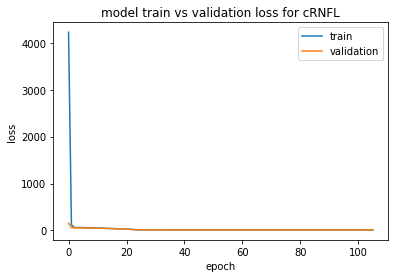

In [22]:
ANN_baseline(X, y_RNFL, 'cRNFL')

Train on 1548 samples, validate on 388 samples
Epoch 1/500
1548/1548 [==============================] - 1s 849us/step - loss: 0.3043 - mean_absolute_error: 0.4375 - acc: 0.0013 - val_loss: 0.1505 - val_mean_absolute_error: 0.3244 - val_acc: 0.0000e+00

Epoch 00001: val_loss improved from inf to 0.15049, saving model to ANN_Interval_best_MD.hdf5
Epoch 2/500
1548/1548 [==============================] - 0s 91us/step - loss: 0.1308 - mean_absolute_error: 0.2946 - acc: 0.0013 - val_loss: 0.1388 - val_mean_absolute_error: 0.3106 - val_acc: 0.0000e+00

Epoch 00002: val_loss improved from 0.15049 to 0.13878, saving model to ANN_Interval_best_MD.hdf5
Epoch 3/500
1548/1548 [==============================] - 0s 84us/step - loss: 0.1134 - mean_absolute_error: 0.2737 - acc: 0.0013 - val_loss: 0.1093 - val_mean_absolute_error: 0.2611 - val_acc: 0.0000e+00

Epoch 00003: val_loss improved from 0.13878 to 0.10931, saving model to ANN_Interval_best_MD.hdf5
Epoch 4/500
1548/1548 [========================

1548/1548 [==============================] - 0s 118us/step - loss: 0.0338 - mean_absolute_error: 0.1305 - acc: 0.0013 - val_loss: 0.0433 - val_mean_absolute_error: 0.1409 - val_acc: 0.0000e+00

Epoch 00058: val_loss did not improve from 0.04299
Epoch 59/500
1548/1548 [==============================] - 0s 77us/step - loss: 0.0336 - mean_absolute_error: 0.1308 - acc: 0.0013 - val_loss: 0.0428 - val_mean_absolute_error: 0.1405 - val_acc: 0.0000e+00

Epoch 00059: val_loss improved from 0.04299 to 0.04276, saving model to ANN_Interval_best_MD.hdf5
Epoch 60/500
1548/1548 [==============================] - 0s 80us/step - loss: 0.0336 - mean_absolute_error: 0.1299 - acc: 0.0013 - val_loss: 0.0429 - val_mean_absolute_error: 0.1405 - val_acc: 0.0000e+00

Epoch 00060: val_loss did not improve from 0.04276
Epoch 61/500
1548/1548 [==============================] - 0s 78us/step - loss: 0.0336 - mean_absolute_error: 0.1303 - acc: 0.0013 - val_loss: 0.0427 - val_mean_absolute_error: 0.1404 - val_acc: 


Epoch 00119: val_loss did not improve from 0.04198
Epoch 120/500
1548/1548 [==============================] - 0s 60us/step - loss: 0.0315 - mean_absolute_error: 0.1248 - acc: 0.0013 - val_loss: 0.0422 - val_mean_absolute_error: 0.1414 - val_acc: 0.0000e+00

Epoch 00120: val_loss did not improve from 0.04198
Epoch 121/500
1548/1548 [==============================] - 0s 61us/step - loss: 0.0315 - mean_absolute_error: 0.1246 - acc: 0.0013 - val_loss: 0.0426 - val_mean_absolute_error: 0.1410 - val_acc: 0.0000e+00

Epoch 00121: val_loss did not improve from 0.04198
Epoch 122/500
1548/1548 [==============================] - 0s 72us/step - loss: 0.0312 - mean_absolute_error: 0.1243 - acc: 0.0013 - val_loss: 0.0422 - val_mean_absolute_error: 0.1406 - val_acc: 0.0000e+00

Epoch 00122: val_loss did not improve from 0.04198
Epoch 123/500
1548/1548 [==============================] - 0s 95us/step - loss: 0.0311 - mean_absolute_error: 0.1239 - acc: 0.0013 - val_loss: 0.0424 - val_mean_absolute_erro

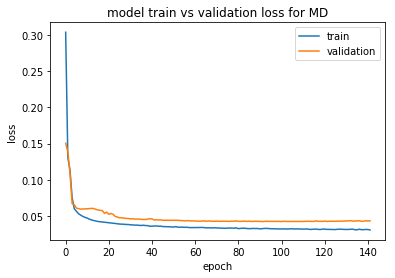

In [23]:
ANN_baseline(X, y_MD, 'MD')

Train on 1548 samples, validate on 388 samples
Epoch 1/500
1548/1548 [==============================] - 1s 674us/step - loss: 3546.2425 - mean_absolute_error: 55.3437 - acc: 0.0000e+00 - val_loss: 139.3901 - val_mean_absolute_error: 11.3135 - val_acc: 0.0026

Epoch 00001: val_loss improved from inf to 139.39014, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 2/500
1548/1548 [==============================] - 0s 118us/step - loss: 54.6957 - mean_absolute_error: 5.6638 - acc: 0.0633 - val_loss: 11.3813 - val_mean_absolute_error: 2.5753 - val_acc: 0.1418

Epoch 00002: val_loss improved from 139.39014 to 11.38129, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 3/500
1548/1548 [==============================] - 0s 87us/step - loss: 12.9389 - mean_absolute_error: 2.5795 - acc: 0.1234 - val_loss: 10.7006 - val_mean_absolute_error: 2.4809 - val_acc: 0.1443

Epoch 00003: val_loss improved from 11.38129 to 10.70060, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 4/500
1548/1548 [====

Epoch 56/500
1548/1548 [==============================] - 0s 67us/step - loss: 5.2731 - mean_absolute_error: 1.3135 - acc: 0.2726 - val_loss: 2.9803 - val_mean_absolute_error: 1.0909 - val_acc: 0.3892

Epoch 00056: val_loss improved from 3.00062 to 2.98027, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 57/500
1548/1548 [==============================] - 0s 91us/step - loss: 5.2705 - mean_absolute_error: 1.3154 - acc: 0.2739 - val_loss: 2.9591 - val_mean_absolute_error: 1.0829 - val_acc: 0.3995

Epoch 00057: val_loss improved from 2.98027 to 2.95910, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 58/500
1548/1548 [==============================] - 0s 113us/step - loss: 5.2621 - mean_absolute_error: 1.3153 - acc: 0.2758 - val_loss: 2.9410 - val_mean_absolute_error: 1.0755 - val_acc: 0.4021

Epoch 00058: val_loss improved from 2.95910 to 2.94098, saving model to ANN_Interval_best_GCIPL.hdf5
Epoch 59/500
1548/1548 [==============================] - 0s 88us/step - loss: 5.2471 - me


Epoch 00085: val_loss did not improve from 2.88679
Epoch 86/500
1548/1548 [==============================] - 0s 83us/step - loss: 4.9217 - mean_absolute_error: 1.3002 - acc: 0.2862 - val_loss: 3.3896 - val_mean_absolute_error: 1.2938 - val_acc: 0.2655

Epoch 00086: val_loss did not improve from 2.88679
Epoch 87/500
1548/1548 [==============================] - 0s 98us/step - loss: 4.9120 - mean_absolute_error: 1.3007 - acc: 0.2849 - val_loss: 3.4069 - val_mean_absolute_error: 1.3006 - val_acc: 0.2629

Epoch 00087: val_loss did not improve from 2.88679
Epoch 88/500
1548/1548 [==============================] - 0s 74us/step - loss: 4.9020 - mean_absolute_error: 1.3010 - acc: 0.2855 - val_loss: 3.4234 - val_mean_absolute_error: 1.3069 - val_acc: 0.2526

Epoch 00088: val_loss did not improve from 2.88679
Epoch 89/500
1548/1548 [==============================] - 0s 78us/step - loss: 4.8916 - mean_absolute_error: 1.3011 - acc: 0.2888 - val_loss: 3.4381 - val_mean_absolute_error: 1.3126 - val_

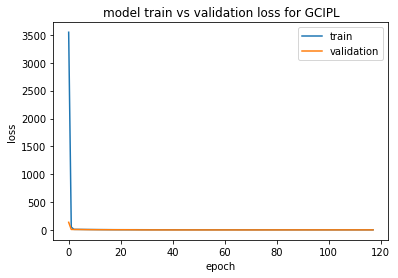

In [24]:
ANN_baseline(X, y_GCA, 'GCIPL')

Train on 1548 samples, validate on 388 samples
Epoch 1/500
1548/1548 [==============================] - 1s 963us/step - loss: 6117.5409 - mean_absolute_error: 72.3121 - acc: 0.0013 - val_loss: 506.6579 - val_mean_absolute_error: 18.1654 - val_acc: 0.0077

Epoch 00001: val_loss improved from inf to 506.65790, saving model to ANN_Interval_best_VFI.hdf5
Epoch 2/500
1548/1548 [==============================] - 0s 132us/step - loss: 238.9953 - mean_absolute_error: 11.6003 - acc: 0.0226 - val_loss: 184.7940 - val_mean_absolute_error: 8.7527 - val_acc: 0.0644

Epoch 00002: val_loss improved from 506.65790 to 184.79403, saving model to ANN_Interval_best_VFI.hdf5
Epoch 3/500
1548/1548 [==============================] - 0s 92us/step - loss: 154.9363 - mean_absolute_error: 8.2825 - acc: 0.0439 - val_loss: 170.0585 - val_mean_absolute_error: 8.6469 - val_acc: 0.0309

Epoch 00003: val_loss improved from 184.79403 to 170.05851, saving model to ANN_Interval_best_VFI.hdf5
Epoch 4/500
1548/1548 [======

Epoch 29/500
1548/1548 [==============================] - 0s 76us/step - loss: 23.8200 - mean_absolute_error: 2.8223 - acc: 0.1415 - val_loss: 35.4737 - val_mean_absolute_error: 3.1940 - val_acc: 0.0876

Epoch 00029: val_loss improved from 35.63111 to 35.47374, saving model to ANN_Interval_best_VFI.hdf5
Epoch 30/500
1548/1548 [==============================] - 0s 75us/step - loss: 23.7767 - mean_absolute_error: 2.8264 - acc: 0.1305 - val_loss: 34.9026 - val_mean_absolute_error: 3.1322 - val_acc: 0.1057

Epoch 00030: val_loss improved from 35.47374 to 34.90265, saving model to ANN_Interval_best_VFI.hdf5
Epoch 31/500
1548/1548 [==============================] - 0s 76us/step - loss: 23.5566 - mean_absolute_error: 2.7979 - acc: 0.1298 - val_loss: 34.9146 - val_mean_absolute_error: 3.0930 - val_acc: 0.1186

Epoch 00031: val_loss did not improve from 34.90265
Epoch 32/500
1548/1548 [==============================] - 0s 72us/step - loss: 23.5212 - mean_absolute_error: 2.8012 - acc: 0.1286 - v

1548/1548 [==============================] - 0s 105us/step - loss: 22.9147 - mean_absolute_error: 2.7722 - acc: 0.1370 - val_loss: 35.0141 - val_mean_absolute_error: 2.9143 - val_acc: 0.1366

Epoch 00060: val_loss did not improve from 33.48384
Epoch 61/500
1548/1548 [==============================] - 0s 79us/step - loss: 22.9387 - mean_absolute_error: 2.7794 - acc: 0.1363 - val_loss: 34.9866 - val_mean_absolute_error: 2.9231 - val_acc: 0.1314

Epoch 00061: val_loss did not improve from 33.48384
Epoch 62/500
1548/1548 [==============================] - 0s 88us/step - loss: 22.9550 - mean_absolute_error: 2.7837 - acc: 0.1389 - val_loss: 35.0997 - val_mean_absolute_error: 2.9412 - val_acc: 0.1211

Epoch 00062: val_loss did not improve from 33.48384
Epoch 63/500
1548/1548 [==============================] - 0s 107us/step - loss: 22.9881 - mean_absolute_error: 2.7927 - acc: 0.1363 - val_loss: 35.0640 - val_mean_absolute_error: 2.9553 - val_acc: 0.1160

Epoch 00063: val_loss did not improve f


Epoch 00091: val_loss did not improve from 33.11917
Epoch 92/500
1548/1548 [==============================] - 0s 77us/step - loss: 21.5904 - mean_absolute_error: 2.6987 - acc: 0.1479 - val_loss: 33.4199 - val_mean_absolute_error: 2.7758 - val_acc: 0.1443

Epoch 00092: val_loss did not improve from 33.11917
Epoch 93/500
1548/1548 [==============================] - 0s 64us/step - loss: 21.7099 - mean_absolute_error: 2.7152 - acc: 0.1441 - val_loss: 33.2432 - val_mean_absolute_error: 2.8981 - val_acc: 0.1211

Epoch 00093: val_loss did not improve from 33.11917
Epoch 94/500
1548/1548 [==============================] - 0s 65us/step - loss: 21.4173 - mean_absolute_error: 2.6804 - acc: 0.1505 - val_loss: 33.4776 - val_mean_absolute_error: 2.7382 - val_acc: 0.1649

Epoch 00094: val_loss did not improve from 33.11917
Epoch 95/500
1548/1548 [==============================] - 0s 76us/step - loss: 21.1376 - mean_absolute_error: 2.6429 - acc: 0.1518 - val_loss: 33.3135 - val_mean_absolute_error: 2


Epoch 00121: val_loss did not improve from 31.09968
Epoch 122/500
1548/1548 [==============================] - 0s 114us/step - loss: 19.9863 - mean_absolute_error: 2.5168 - acc: 0.1764 - val_loss: 31.6844 - val_mean_absolute_error: 2.5953 - val_acc: 0.2268

Epoch 00122: val_loss did not improve from 31.09968
Epoch 123/500
1548/1548 [==============================] - 0s 82us/step - loss: 19.9850 - mean_absolute_error: 2.5152 - acc: 0.1764 - val_loss: 31.1081 - val_mean_absolute_error: 2.5740 - val_acc: 0.2320

Epoch 00123: val_loss did not improve from 31.09968
Epoch 124/500
1548/1548 [==============================] - 0s 65us/step - loss: 20.1855 - mean_absolute_error: 2.5387 - acc: 0.1686 - val_loss: 29.9319 - val_mean_absolute_error: 2.6038 - val_acc: 0.2474

Epoch 00124: val_loss improved from 31.09968 to 29.93193, saving model to ANN_Interval_best_VFI.hdf5
Epoch 125/500
1548/1548 [==============================] - 0s 67us/step - loss: 20.0201 - mean_absolute_error: 2.5198 - acc: 0


Epoch 00184: val_loss did not improve from 28.98907
Epoch 185/500
1548/1548 [==============================] - 0s 72us/step - loss: 19.4511 - mean_absolute_error: 2.5159 - acc: 0.1525 - val_loss: 31.9348 - val_mean_absolute_error: 2.6455 - val_acc: 0.1959

Epoch 00185: val_loss did not improve from 28.98907
Epoch 186/500
1548/1548 [==============================] - 0s 83us/step - loss: 19.3894 - mean_absolute_error: 2.5210 - acc: 0.1499 - val_loss: 31.4149 - val_mean_absolute_error: 2.7060 - val_acc: 0.1675

Epoch 00186: val_loss did not improve from 28.98907
Epoch 187/500
1548/1548 [==============================] - 0s 81us/step - loss: 19.3752 - mean_absolute_error: 2.5241 - acc: 0.1525 - val_loss: 32.0107 - val_mean_absolute_error: 2.7724 - val_acc: 0.1418

Epoch 00187: val_loss did not improve from 28.98907
Epoch 188/500
1548/1548 [==============================] - 0s 77us/step - loss: 19.4548 - mean_absolute_error: 2.5347 - acc: 0.1641 - val_loss: 31.5630 - val_mean_absolute_erro


Epoch 00216: val_loss did not improve from 28.98907
Epoch 217/500
1548/1548 [==============================] - 0s 59us/step - loss: 19.3325 - mean_absolute_error: 2.5591 - acc: 0.1557 - val_loss: 28.8988 - val_mean_absolute_error: 2.6417 - val_acc: 0.1933

Epoch 00217: val_loss improved from 28.98907 to 28.89885, saving model to ANN_Interval_best_VFI.hdf5
Epoch 218/500
1548/1548 [==============================] - 0s 70us/step - loss: 18.9414 - mean_absolute_error: 2.4692 - acc: 0.1764 - val_loss: 30.7821 - val_mean_absolute_error: 2.7307 - val_acc: 0.1443

Epoch 00218: val_loss did not improve from 28.89885
Epoch 219/500
1548/1548 [==============================] - 0s 70us/step - loss: 19.0529 - mean_absolute_error: 2.5056 - acc: 0.1609 - val_loss: 31.3254 - val_mean_absolute_error: 2.8009 - val_acc: 0.1366

Epoch 00219: val_loss did not improve from 28.89885
Epoch 220/500
1548/1548 [==============================] - 0s 66us/step - loss: 19.0273 - mean_absolute_error: 2.5125 - acc: 0.

1548/1548 [==============================] - 0s 95us/step - loss: 18.4745 - mean_absolute_error: 2.4860 - acc: 0.1583 - val_loss: 30.3497 - val_mean_absolute_error: 2.8156 - val_acc: 0.1263

Epoch 00279: val_loss did not improve from 26.83473
Epoch 280/500
1548/1548 [==============================] - 0s 98us/step - loss: 18.5507 - mean_absolute_error: 2.4861 - acc: 0.1641 - val_loss: 30.7661 - val_mean_absolute_error: 2.8005 - val_acc: 0.1237

Epoch 00280: val_loss did not improve from 26.83473
Epoch 281/500
1548/1548 [==============================] - 0s 81us/step - loss: 18.5121 - mean_absolute_error: 2.4937 - acc: 0.1621 - val_loss: 28.9859 - val_mean_absolute_error: 2.8989 - val_acc: 0.1160

Epoch 00281: val_loss did not improve from 26.83473
Epoch 282/500
1548/1548 [==============================] - 0s 86us/step - loss: 18.6098 - mean_absolute_error: 2.4997 - acc: 0.1615 - val_loss: 30.4652 - val_mean_absolute_error: 2.7766 - val_acc: 0.1289

Epoch 00282: val_loss did not improve 


Epoch 00310: val_loss did not improve from 26.49106
Epoch 311/500
1548/1548 [==============================] - 0s 91us/step - loss: 18.6436 - mean_absolute_error: 2.5276 - acc: 0.1641 - val_loss: 27.7575 - val_mean_absolute_error: 2.6877 - val_acc: 0.1624

Epoch 00311: val_loss did not improve from 26.49106
Epoch 312/500
1548/1548 [==============================] - 0s 76us/step - loss: 18.5468 - mean_absolute_error: 2.4815 - acc: 0.1725 - val_loss: 26.4839 - val_mean_absolute_error: 2.6587 - val_acc: 0.1675

Epoch 00312: val_loss improved from 26.49106 to 26.48388, saving model to ANN_Interval_best_VFI.hdf5
Epoch 313/500
1548/1548 [==============================] - 0s 82us/step - loss: 18.9132 - mean_absolute_error: 2.5041 - acc: 0.1634 - val_loss: 26.0812 - val_mean_absolute_error: 2.7376 - val_acc: 0.1675

Epoch 00313: val_loss improved from 26.48388 to 26.08119, saving model to ANN_Interval_best_VFI.hdf5
Epoch 314/500
1548/1548 [==============================] - 0s 79us/step - loss

1548/1548 [==============================] - 0s 77us/step - loss: 18.0277 - mean_absolute_error: 2.4393 - acc: 0.1705 - val_loss: 29.8982 - val_mean_absolute_error: 2.8062 - val_acc: 0.1366

Epoch 00342: val_loss did not improve from 26.08119
Epoch 343/500
1548/1548 [==============================] - 0s 86us/step - loss: 18.1536 - mean_absolute_error: 2.4592 - acc: 0.1757 - val_loss: 29.9370 - val_mean_absolute_error: 2.8109 - val_acc: 0.1366

Epoch 00343: val_loss did not improve from 26.08119
Epoch 344/500
1548/1548 [==============================] - 0s 86us/step - loss: 18.1542 - mean_absolute_error: 2.4602 - acc: 0.1757 - val_loss: 30.0374 - val_mean_absolute_error: 2.8383 - val_acc: 0.1314

Epoch 00344: val_loss did not improve from 26.08119
Epoch 345/500
1548/1548 [==============================] - 0s 69us/step - loss: 18.0908 - mean_absolute_error: 2.4529 - acc: 0.1809 - val_loss: 29.9595 - val_mean_absolute_error: 2.8186 - val_acc: 0.1366

Epoch 00345: val_loss did not improve 

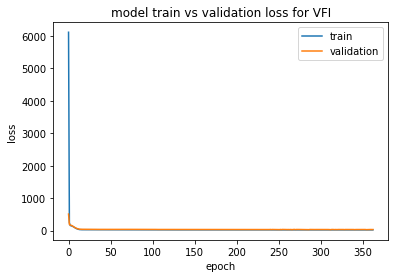

In [25]:
ANN_baseline(X, y_VFI, 'VFI')